# nema3 PDE=0.3, sigmaT = 50 ps, SiPMs naked phot 

- Phantom : nema 3
- Events: phot
- Detector geometry: SiPMs in LXe, with naked sipms
- Time resolution: 50 ps
- qcut > 5 pes
- ntof > 7
- PDE = 0.3

In [1]:
import Pkg

In [3]:
Pkg.add.(["HTTP", "Plots", "DataFrames", "HDF5","DrWatson", "StatsBase", "PhysicalConstants"]);

In [6]:
Pkg.add.(["LsqFit","GLM"])

2-element Vector{Nothing}:
 nothing
 nothing

In [7]:
Pkg.add("Distributions") 

In [1]:
#using Distributions

In [2]:
#using LsqFit
#using GLM
#using HTTP
#using Test

In [2]:
using Plots
using DataFrames
using HDF5
using DrWatson
using PhysicalConstants
using PhysicalConstants.CODATA2018
using Unitful

In [3]:
using Glob
using CSV

In [4]:
using Statistics
using StatsBase
using Printf

In [5]:
using Logging

In [6]:
@quickactivate "JPetalo"

In [7]:
pwd()

"/Users/jj/JuliaProjects/JPetalo/notebooks"

In [8]:
datadir()

"/Users/jj/JuliaProjects/JPetalo/data"

In [9]:
srcdir()

"/Users/jj/JuliaProjects/JPetalo/src"

In [10]:
include(srcdir("JPetalo.jl"))

Main.JPetalo

In [11]:
import Unitful:
    nm, μm, mm, cm, m, km, inch, ft, mi,
    ac,
    mg, g, kg,
    Ra, °F, °C, K,
    rad, °,
    ns, μs, ms, ps, s, minute, hr, d, yr, Hz,
    eV,
    μJ, mJ, J,
	mW, μW, W,
    A, N, mol, mmol, V, L, mL, μL, M

In [12]:
function loglevel(log)
    if log == "Debug"
        logger = SimpleLogger(stdout, Logging.Debug)
    elseif log =="Info"
        logger = SimpleLogger(stdout, Logging.Info)
    else
        logger = SimpleLogger(stdout, Logging.Warn)
    end
    old_logger = global_logger(logger)
end

loglevel (generic function with 1 method)

In [13]:
loglevel("Warn")

Base.CoreLogging.SimpleLogger(IJulia.IJuliaStdio{Base.PipeEndpoint}(IOContext(Base.PipeEndpoint(RawFD(44) open, 0 bytes waiting))), Info, Dict{Any, Int64}())

## Read data file with nema3 events, phot interactions with 2 gammas in detector

In [14]:
filename = "n3-phot-p4"
sipm = "naked"
proc ="phot"

ndf = JPetalo.readdf(filename) 
println("reading ", filename, " length =", nrow(ndf))

reading n3-phot-p4 length =55069


In [15]:
println(names(ndf))

["nsipm1", "nsipm2", "phistd1", "phistd2", "q1", "q2", "r1", "r2", "t1", "t2", "ta1", "ta2", "tr1", "tr2", "ux", "uy", "uz", "x1", "x2", "xb1", "xb2", "xr1", "xr2", "xs", "xt1", "xt2", "y1", "y2", "yb1", "yb2", "yr1", "yr2", "ys", "yt1", "yt2", "z1", "z2", "zb1", "zb2", "zr1", "zr2", "zs", "zstd1", "zstd2", "zt1", "zt2"]


## q1 vs q2

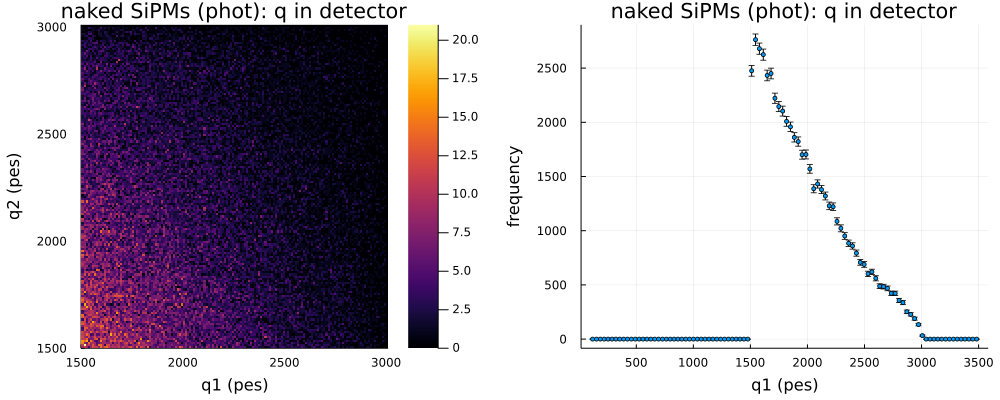

In [16]:
JPetalo.q1vsq2(ndf, tit="$sipm SiPMs ($proc): q in detector", filename="q1q2-$sipm-$proc")

## Cut in (q1,q2) 

In [17]:
ndfq =JPetalo.selectinterval(ndf, "q1", "q2", 1500.0, 3000.0);
println("after q1q2 cut: ndfq has a length of ", nrow(ndfq))

after q1q2 cut: ndfq has a length of 55057


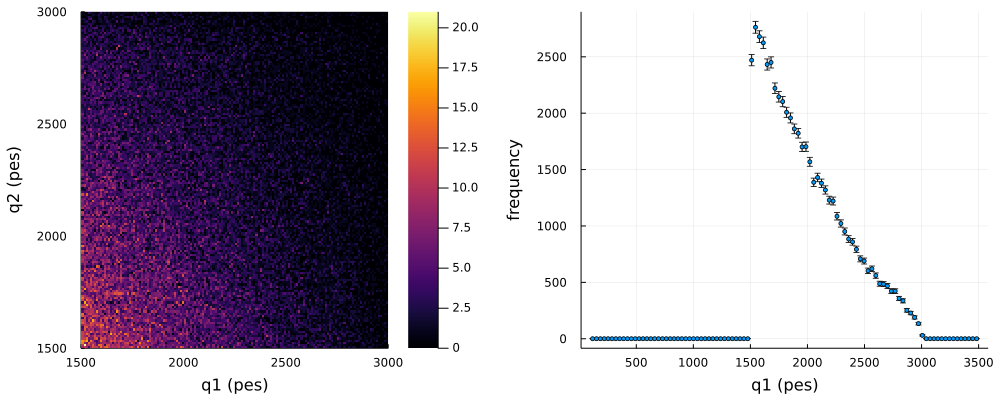

In [18]:
JPetalo.q1vsq2(ndfq)

## r vs q

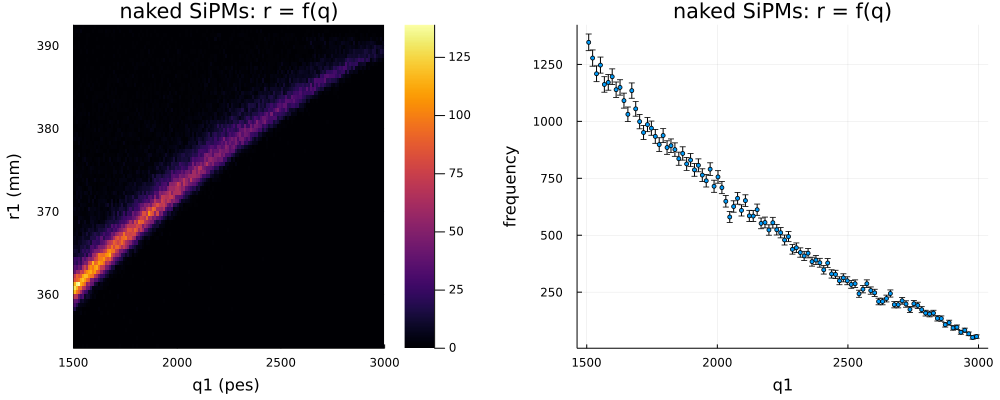

In [22]:
JPetalo.r1q1(ndfq,tit="$sipm SiPMs: r = f(q)", filename="rq-$sipm-$proc")

In [23]:
cq, fq, pq = JPetalo.nfit_profile(ndfq, "q1","r1","q1 (pes) ","r1 (mm)", "pol2")

for q1=f(r1): fit parameters =[309.13565150706916, 0.043221338436013494, -5.431232255220631e-6]


([309.13565150706916, 0.043221338436013494, -5.431232255220631e-6], Main.JPetalo.var"#f2#49"{Vector{Float64}}([309.13565150706916, 0.043221338436013494, -5.431232255220631e-6]), Plot{Plots.GRBackend() n=2})

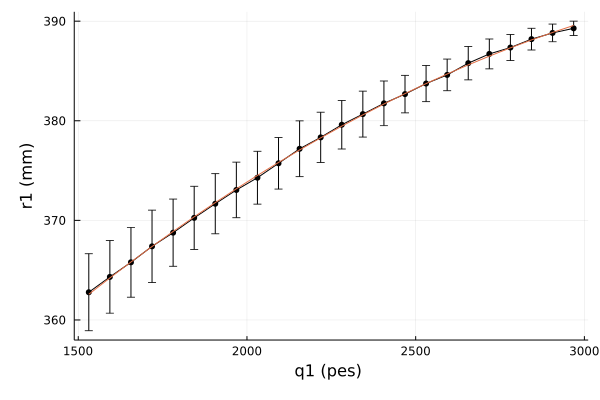

In [24]:
JPetalo.nplot_profile(pq, filename="rq-profile-fit-$sipm-$proc")

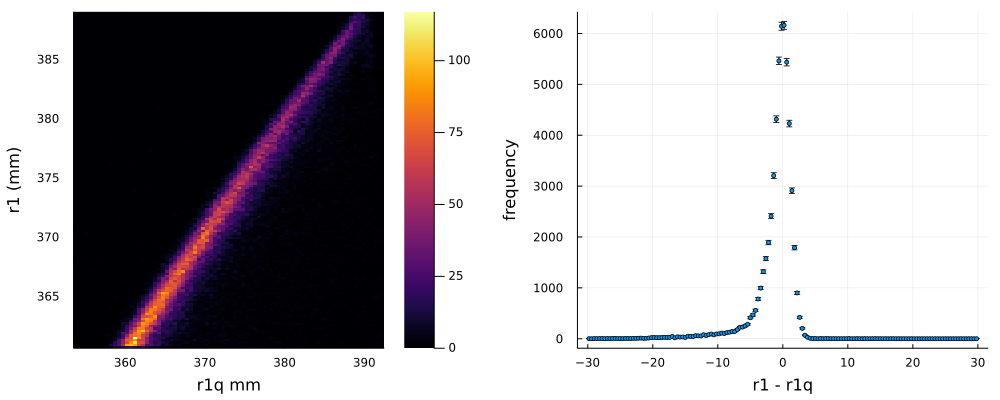

In [25]:
r1q = fq.(ndfq.q1) - 1.0 * ones(nrow(ndfq))
JPetalo.plotreso(r1q, ndfq.r1, "r1q mm", "r1 (mm)", "r1 - r1q", -30., 30., 150)

 σ =     1.3 mm

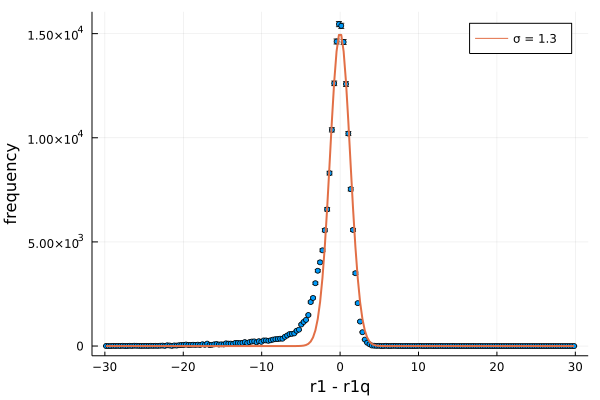

In [26]:
fg,p = JPetalo.fitg1(r1q - ndfq.r1, "r1 - r1q", 200, -30.0, 30.0, xgmin=-10.0, xgmax=10.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(p)

σt =   2.722 σ =   1.047

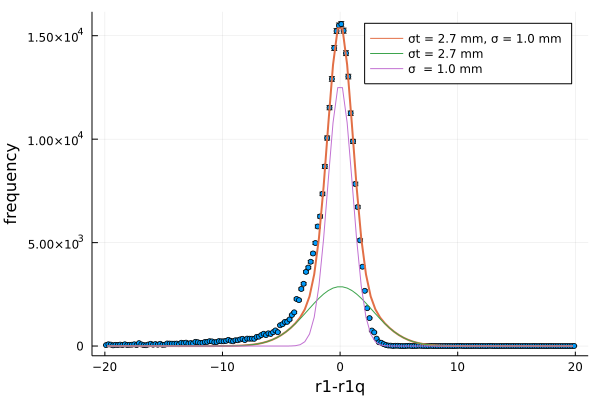

In [27]:
fg, p = JPetalo.fitg2(r1q - ndfq.r1, "r1-r1q", 200, -20.0, 20.0, 
                      xg1min=-20.0, xg1max=-5.0, 
                      xg2min=-5.0,  xg2max =5.0, 
                      xgmin =-20.0, xgmax  =20.0)
@printf "σt = %7.3f σ = %7.3f" fg.std[1] fg.std[2]
plot(p)

In [28]:
JPetalo.saveplot(p, "rq-resolution-$sipm-$proc")

In [29]:
cq2, fq2, p2q = JPetalo.nfit_profile(ndfq, "q2","r2","q2 (pes) ","r2 (mm)", "pol2")

for q2=f(r2): fit parameters =[310.1847650988824, 0.04327852147242343, -5.543377887193129e-6]


([310.1847650988824, 0.04327852147242343, -5.543377887193129e-6], Main.JPetalo.var"#f2#49"{Vector{Float64}}([310.1847650988824, 0.04327852147242343, -5.543377887193129e-6]), Plot{Plots.GRBackend() n=2})

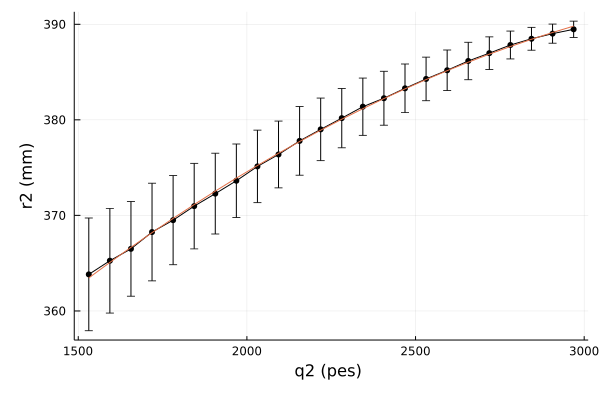

In [30]:
JPetalo.nplot_profile(p2q)

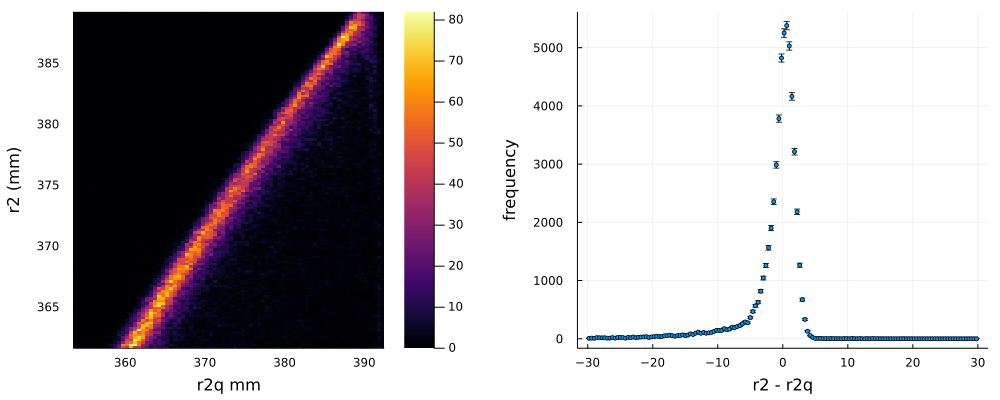

In [31]:
r2q = fq2.(ndfq.q2) - 1.0 * ones(length(ndfq.q2)) ;
JPetalo.plotreso( r2q, ndfq.r2, "r2q mm", "r2 (mm)", "r2 - r2q", -30., 30.)

 σ =     1.6 mm

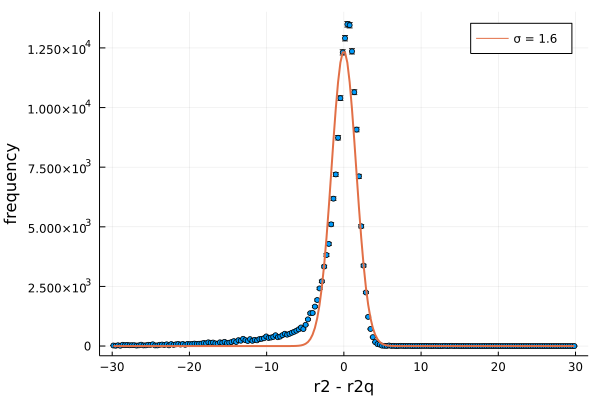

In [32]:
fg,p = JPetalo.fitg1(r2q - ndfq.r2, "r2 - r2q", 200, -30.0, 30.0, xgmin=-10.0, xgmax=10.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(p)

## ZSTD

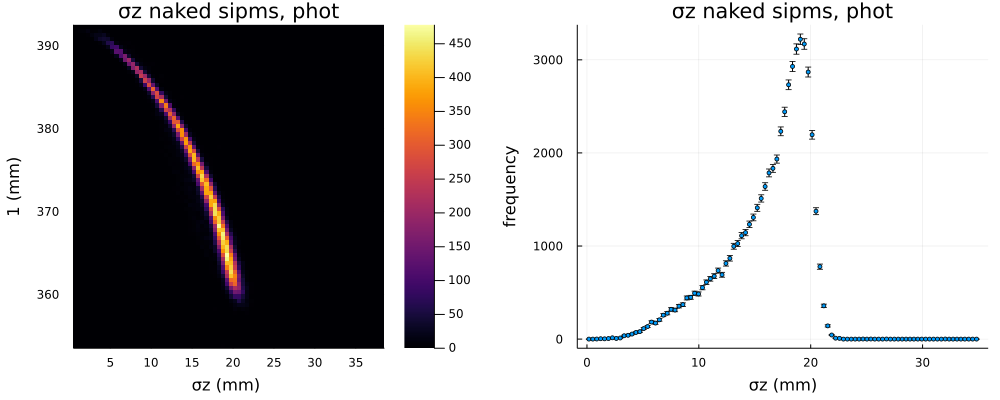

In [33]:
JPetalo.zstd(ndfq, tit="σz $sipm sipms, $proc", filename="zstd-$sipm-$proc")

In [34]:
ndfz =JPetalo.selectinterval(ndfq, "zstd1", "zstd2", 1.0, 20.0);

for zstd1=f(r1): fit parameters =[392.77757188733136, -0.4641682801354935, -0.010232812737988135, -0.002089334777576414]


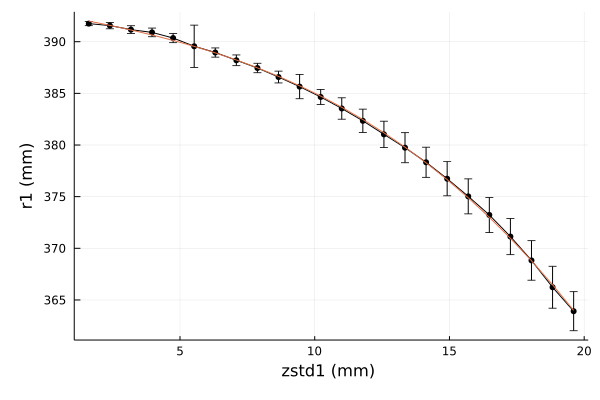

In [35]:
cz, fz, pz = JPetalo.nfit_profile(ndfz, "zstd1","r1","zstd1 (mm) ","r1 (mm)", "pol3")
JPetalo.nplot_profile(pz)

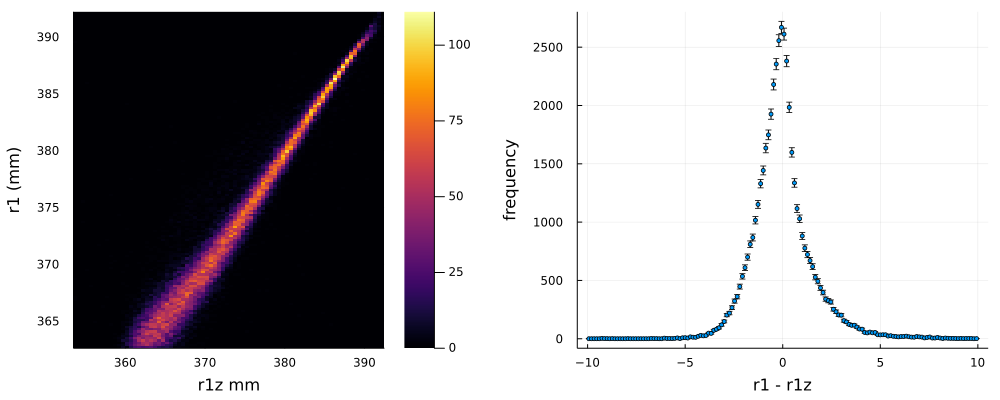

In [36]:
r1z = fz.(ndfz.zstd1) + 0.0 * ones(length(ndfz.q1)) ;
JPetalo.plotreso(r1z, ndfz.r1, "r1z mm", "r1 (mm)", "r1 - r1z", -10., 10.)

 σ =     1.0 mm

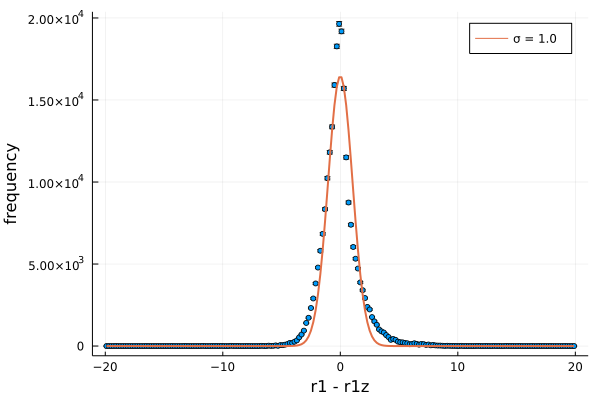

In [37]:
fg,p = JPetalo.fitg1(r1z - ndfz.r1, "r1 - r1z", 200, -20.0, 20.0, xgmin=-10.0, xgmax=10.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(p)

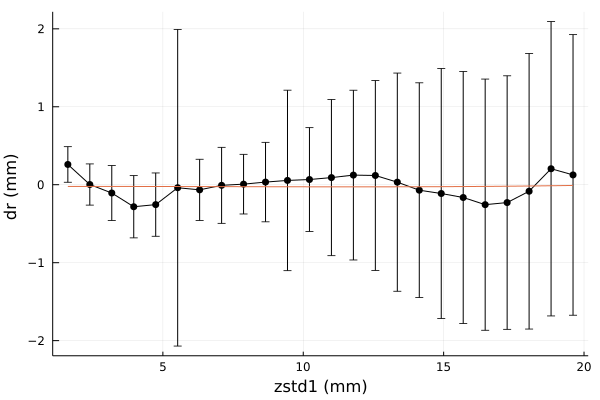

In [38]:
cx, fx, px = JPetalo.fit_profile(ndfz.zstd1, r1z - ndfz.r1, "zstd1 (mm)", "dr (mm) ", "pol3")
plot(px)

for zstd2=f(r2): fit parameters =[392.6789373401048, -0.3938920922798121, -0.01880966015933467, -0.0018134201928603293]


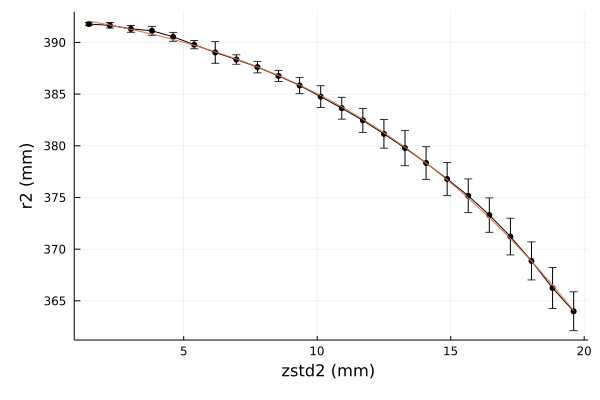

In [39]:
cz2, fz2, pz2 = JPetalo.nfit_profile(ndfz, "zstd2","r2","zstd2 (mm) ","r2 (mm)", "pol3")
JPetalo.nplot_profile(pz2)

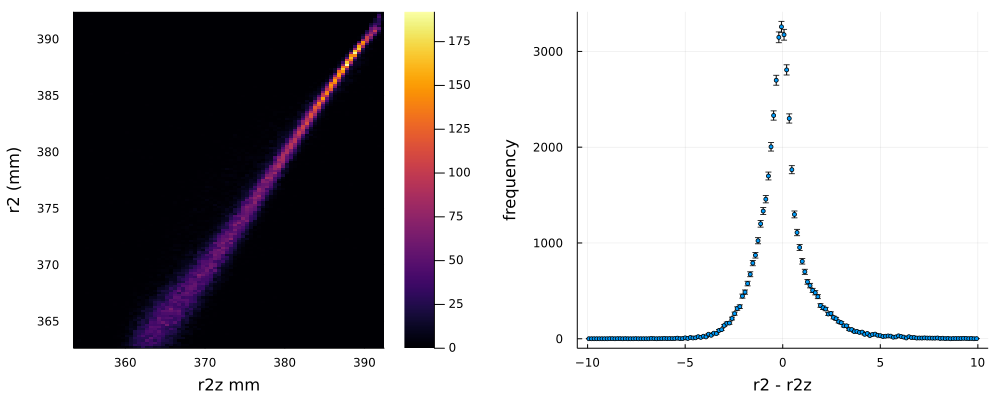

In [40]:
r2z = fz.(ndfz.zstd2) + 0.0 * ones(length(ndfz.q1)) ;
JPetalo.plotreso(r2z, ndfz.r2, "r2z mm", "r2 (mm)", "r2 - r2z", -10., 10.)

 σ =     0.8 mm

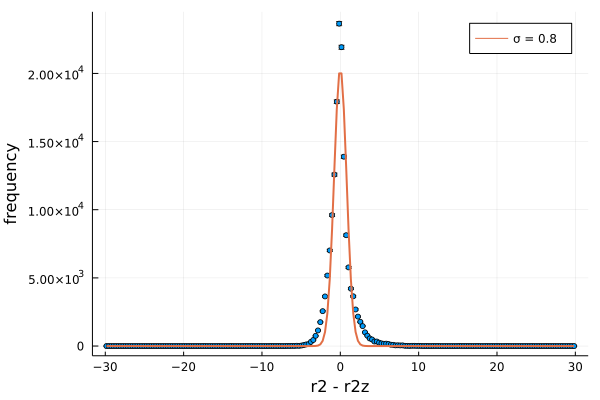

In [41]:
fg,p = JPetalo.fitg1(r2z - ndfz.r2, "r2 - r2z", 200, -30.0, 30.0, xgmin=-10.0, xgmax=10.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(p)

In [42]:
nrow(ndfz)

47322

## PhiSTD

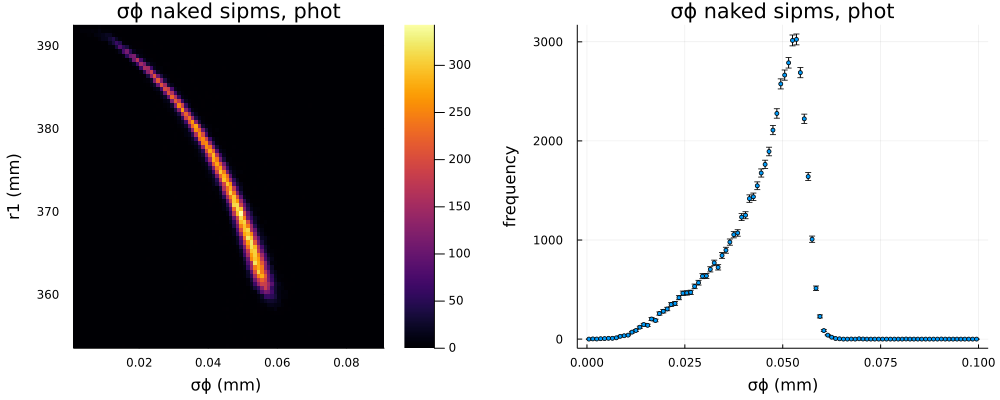

In [43]:
JPetalo.phistd(ndfq,tit="σϕ $sipm sipms, $proc", filename="phistd-$sipm-$proc")

In [44]:
ndfp =JPetalo.selectinterval(ndfq, "phistd1", "phistd2", 0.001, 0.050);

for phistd1=f(r1): fit parameters =[392.38481827382105, -98.2699172404883, -5038.434997383723, -47524.3846431528]


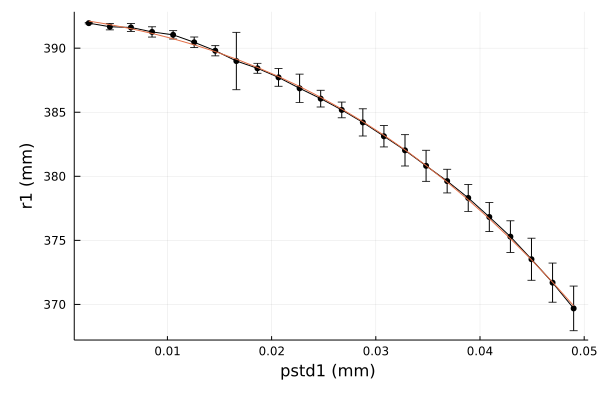

In [45]:
cp, fp, pp = JPetalo.nfit_profile(ndfp, "phistd1","r1","pstd1 (mm) ","r1 (mm)", "pol3")
JPetalo.nplot_profile(pp, filename="phistd-naked-profile-fit")

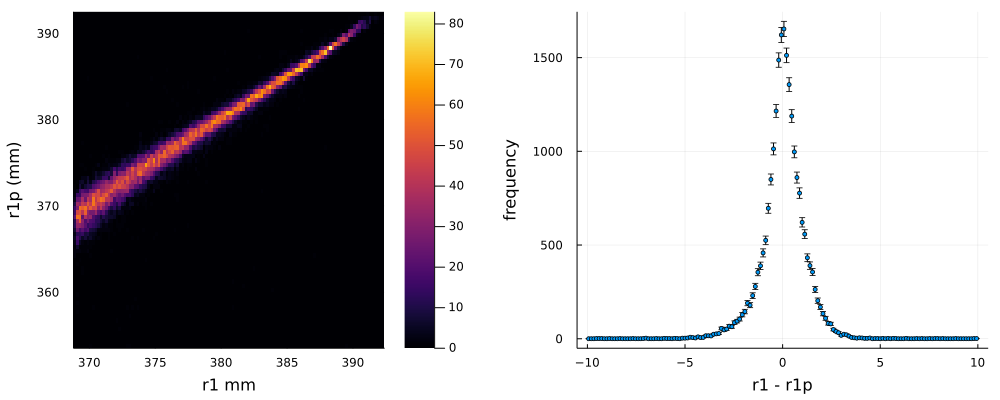

In [46]:
r1p = fp.(ndfp.phistd1) + 0.0 * ones(length(ndfp.q1))
JPetalo.plotreso(ndfp.r1, r1p, "r1 mm", "r1p (mm)", "r1 - r1p", -10., 10.)

 σ =     0.8 mm

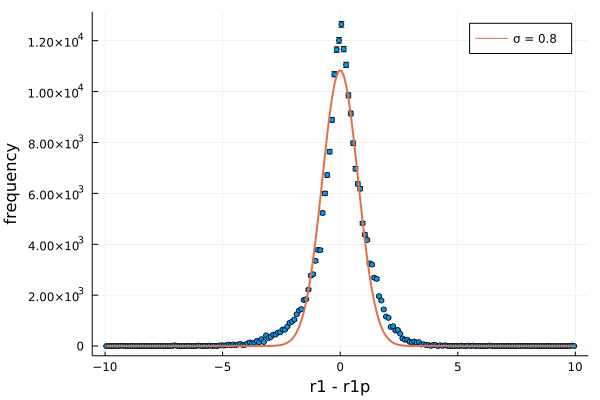

In [47]:
fg,pg = JPetalo.fitg1(ndfp.r1 - r1p, "r1 - r1p", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

zt-zr σ1 =   1.102 σ2 =   0.386

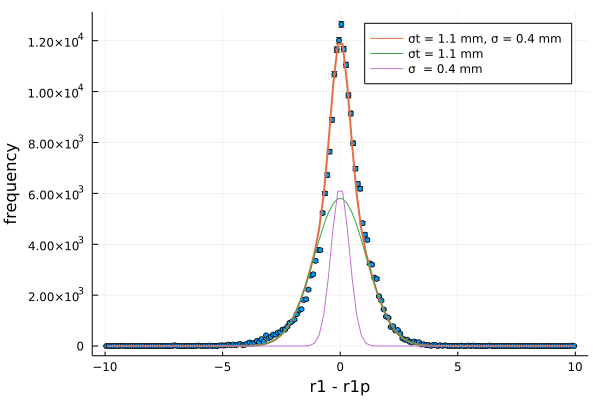

In [48]:
fg, p = JPetalo.fitg2(ndfp.r1 - r1p, "r1 - r1p", 200, -10.0, 10.0, 
                      xg1min=-10.0, xg1max=-2.5, 
                      xg2min=-2.5,  xg2max =2.5, 
                      xgmin =-10.0, xgmax  =10.0)
@printf "zt-zr σ1 = %7.3f σ2 = %7.3f" fg.std[1] fg.std[2]
plot(p)

In [49]:
JPetalo.saveplot(p, "phistd-resolution-$sipm-$proc")

In [50]:
@printf "Resolution in R (σϕ estimaor) FWHM = %7.1f %s" 2.3 * fg.std[2] "mm" 

Resolution in R (σϕ estimaor) FWHM =     0.9 mm

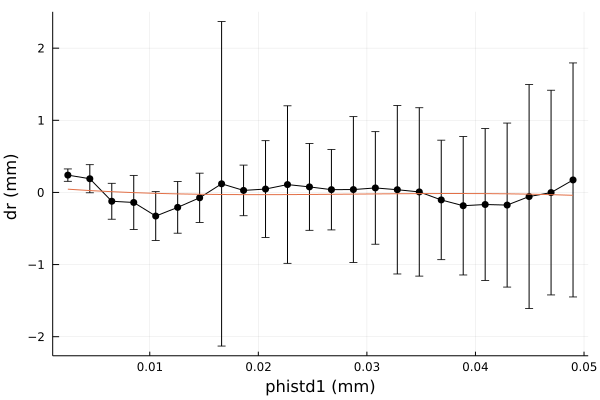

In [51]:
cx, fx, px = JPetalo.fit_profile(ndfp.phistd1, r1p - ndfp.r1, "phistd1 (mm)", "dr (mm) ", "pol3")
plot(px)

for phistd2=f(r2): fit parameters =[392.3071683252169, -75.39496687046051, -6061.950949328008, -35439.54195382257]


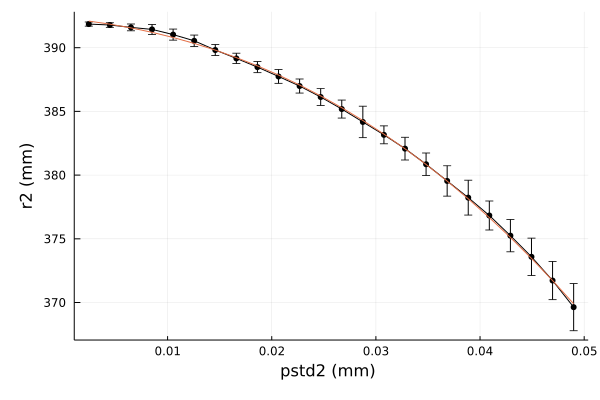

In [52]:
cp2, fp2, pp2 = JPetalo.nfit_profile(ndfp, "phistd2","r2","pstd2 (mm) ","r2 (mm)", "pol3")
JPetalo.nplot_profile(pp2)

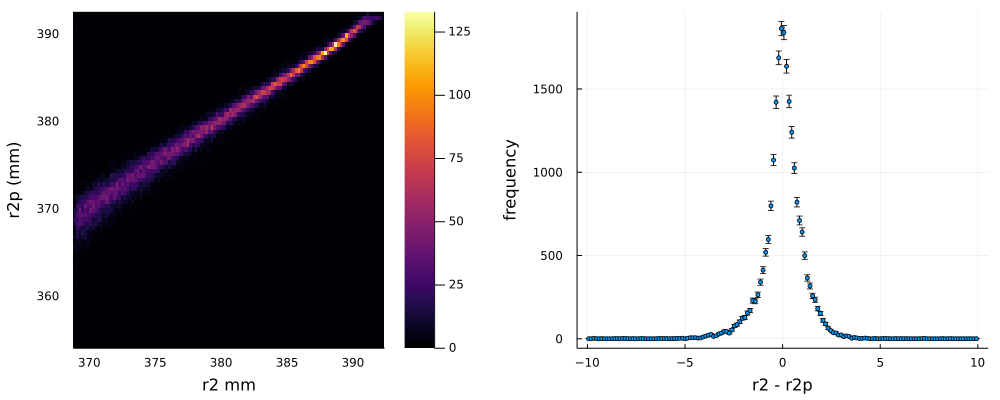

In [53]:
r2p = fp.(ndfp.phistd2) + 0.0 * ones(length(ndfp.q2))
JPetalo.plotreso(ndfp.r2, r2p, "r2 mm", "r2p (mm)", "r2 - r2p", -10., 10.)

 σ =     0.6 mm

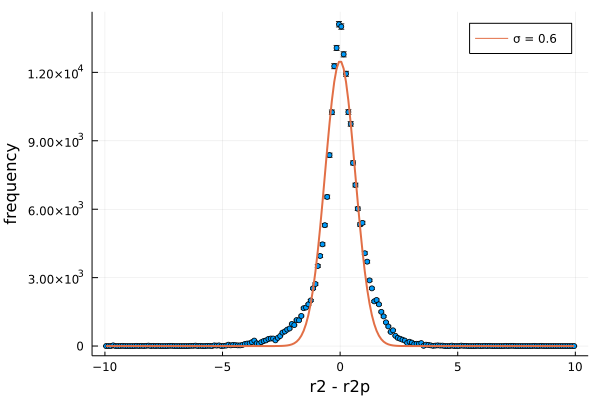

In [57]:
fg,pg = JPetalo.fitg1(ndfp.r2 - r2p, "r2 - r2p", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

In [58]:
nrow(ndfq)

55057

In [59]:
nrow(ndfp)

22537

## Resolution in (x,y,z,r) intrinsic

In [60]:
function ires(df; lim = 10.0)
    hx, px = JPetalo.hist1d(df.xt1 - df.x1, "xt - xr", 50,  -lim, lim)
    hz, pz = JPetalo.hist1d(df.zt1 - df.z1, "zt - zr", 50,  -lim, lim)
    plot(px,pz, layout= (1, 2), size = (800, 400), legend=false, fmt = :png,
        left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)
end

ires (generic function with 1 method)

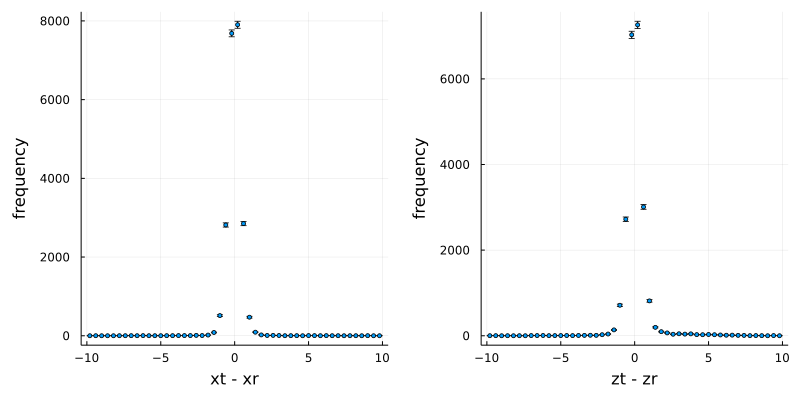

In [61]:
ires(ndfp, lim = 10.0)

zt-zr σ1 =   0.717 σ2 =   0.343

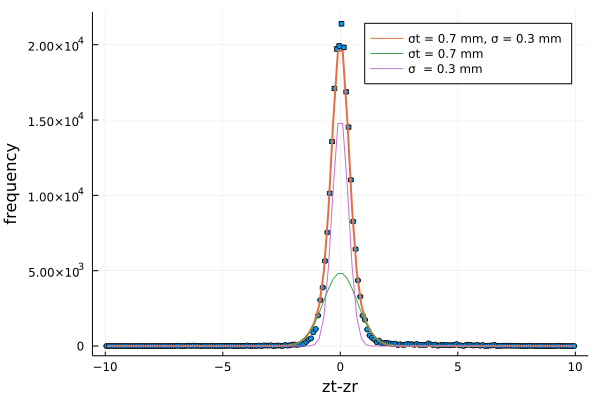

In [62]:
fg, p = JPetalo.fitg2(ndfp.zt1 - ndfp.z1, "zt-zr", 200, -10.0, 10.0, 
                      xg1min=-10.0, xg1max=-2.5, 
                      xg2min=-2.5,  xg2max =2.5, 
                      xgmin =-10.0, xgmax  =10.0)
@printf "zt-zr σ1 = %7.3f σ2 = %7.3f" fg.std[1] fg.std[2]
plot(p)

 σ =     0.4 mm

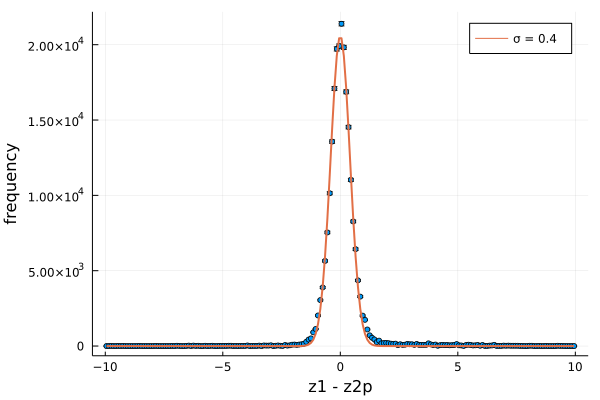

In [63]:
fg,pg = JPetalo.fitg1(ndfp.zt1 - ndfp.z1, "z1 - z2p", 200, -10.0, 10.0, xgmin=-3.0, xgmax=3.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

## Position from best estimator (r1p)

In [66]:
xp1,yp1,zp1 = JPetalo.radial_correction(ndfp.xr1, ndfp.yr1, ndfp.zr1, r1p);
xp2,yp2,zp2 = JPetalo.radial_correction(ndfp.xr2, ndfp.yr2, ndfp.zr2, r2p);

In [67]:
xz1,yz1,zz1 = JPetalo.radial_correction(ndfz.xr1, ndfz.yr1, ndfz.zr1, r1z);
xz2,yz2,zz2 = JPetalo.radial_correction(ndfz.xr2, ndfz.yr2, ndfz.zr2, r2z);

 σ =     0.6 mm

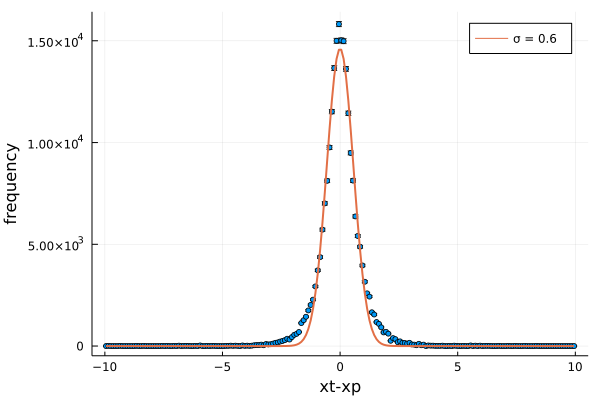

In [68]:
fg,pg = JPetalo.fitg1(ndfp.xt1 - xp1, "xt-xp", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

sigma1 =   0.899 sigma2 =   0.379

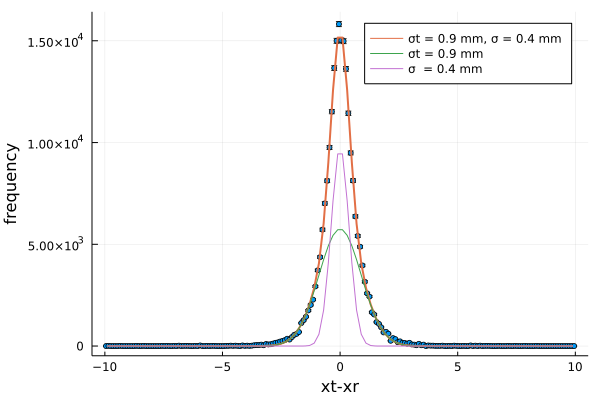

In [69]:
fg, p = JPetalo.fitg2(ndfp.xt1 - xp1, "xt-xr", 200, -10.0, 10.0, 
                      xg1min=-10.0, xg1max=-3.0, 
                      xg2min=-3.0,  xg2max =3.0, 
                      xgmin =-10.0, xgmax  =10.0)
@printf "sigma1 = %7.3f sigma2 = %7.3f" fg.std[1] fg.std[2]
plot(p)

In [73]:
JPetalo.saveplot(p, "phistd-x-resolution-$sipm-$proc")

In [71]:
@printf " resolution in (x,y,z) FWHM  = %7.1f mm" 2.3 * fg.std[2] 

 resolution in (x,y,z) FWHM  =     0.9 mm

sigma1 =   1.134 sigma2 =   0.401

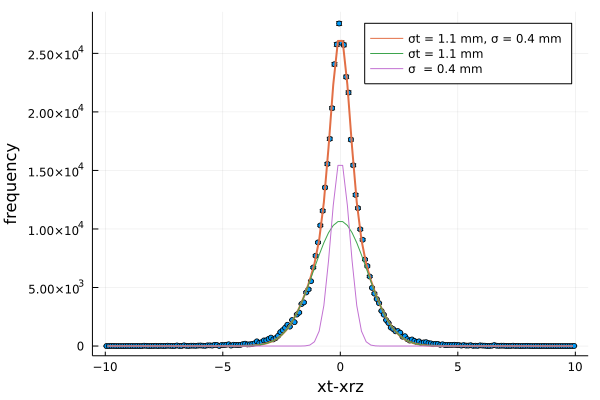

In [72]:
fg, p = JPetalo.fitg2(ndfz.xt1 - xz1, "xt-xrz", 200, -10.0, 10.0, 
                      xg1min=-10.0, xg1max=-3.0, 
                      xg2min=-3.0,  xg2max =3.0, 
                      xgmin =-10.0, xgmax  =10.0)
@printf "sigma1 = %7.3f sigma2 = %7.3f" fg.std[1] fg.std[2]
plot(p)

In [74]:
JPetalo.saveplot(p, "zstd-x-resolution-$sipm-$proc")

 σ =     0.6 mm

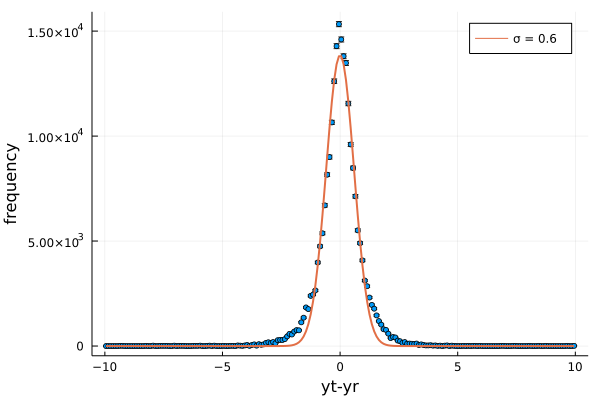

In [75]:
fg,pg = JPetalo.fitg1(ndfp.yt1 - yp1, "yt-yr", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

sigma1 =   0.990 sigma2 =   0.417

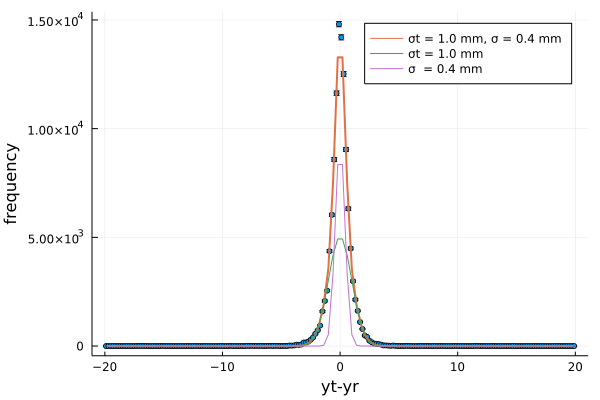

In [76]:
fg, p = JPetalo.fitg2(ndfp.yt1 - yp1, "yt-yr", 200, -20.0, 20.0, 
                      xg1min=-20.0, xg1max=-3.0, 
                      xg2min=-3.0,  xg2max =3.0, 
                      xgmin =-20.0, xgmax  =20.0)
@printf "sigma1 = %7.3f sigma2 = %7.3f" fg.std[1] fg.std[2]
plot(p)

sigma1 =   1.167 sigma2 =   0.420

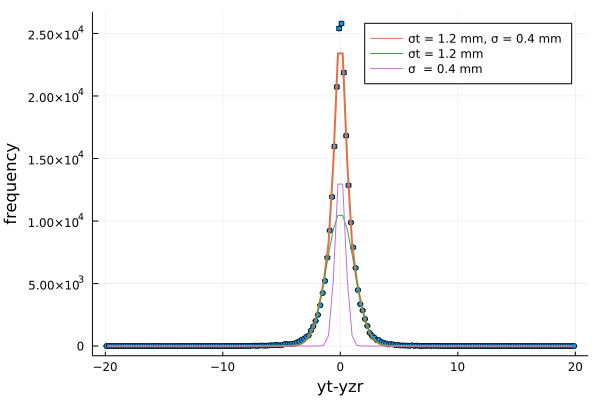

In [77]:
fg, p = JPetalo.fitg2(ndfz.yt1 - yz1, "yt-yzr", 200, -20.0, 20.0, 
                      xg1min=-20.0, xg1max=-3.0, 
                      xg2min=-3.0,  xg2max =3.0, 
                      xgmin =-20.0, xgmax  =20.0)
@printf "sigma1 = %7.3f sigma2 = %7.3f" fg.std[1] fg.std[2]
plot(p)

 σ =     0.4 mm

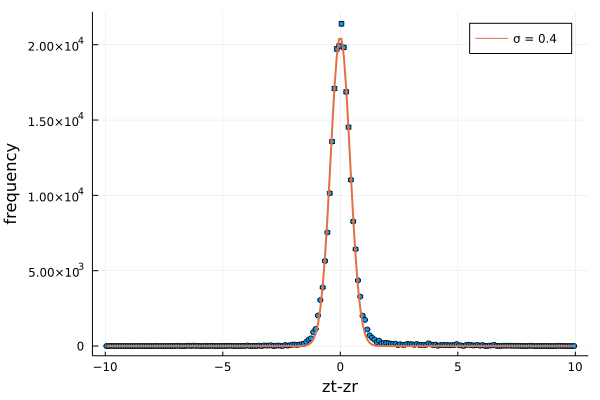

In [206]:
fg,pg = JPetalo.fitg1(ndfp.zt1 - zp1, "zt-zr", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

sigma1 =   0.762 sigma2 =   0.348

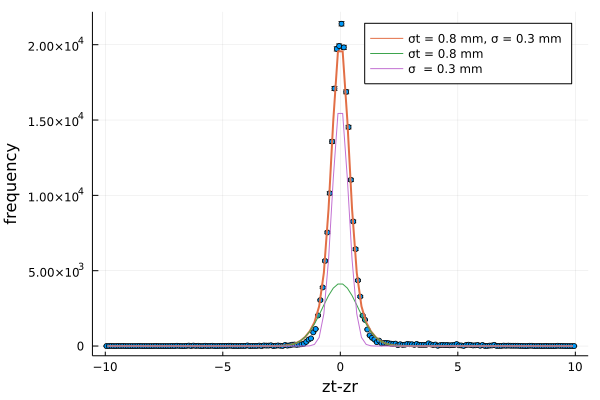

In [209]:
fg, p = JPetalo.fitg2(ndfp.zt1 - zp1, "zt-zr", 200, -10.0, 10.0, 
                      xg1min=-10.0, xg1max=-3.0, 
                      xg2min=-3.0,  xg2max =3.0, 
                      xgmin =-10.0, xgmax  =10.0)
@printf "sigma1 = %7.3f sigma2 = %7.3f" fg.std[1] fg.std[2]
plot(p)

 σ =     0.5 mm

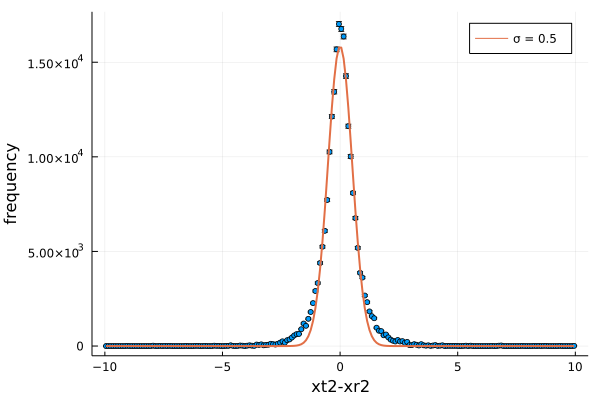

In [210]:
fg,pg = JPetalo.fitg1(ndfp.xt2 - xp2, "xt2-xr2", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

sigma1 =   0.925 sigma2 =   0.397

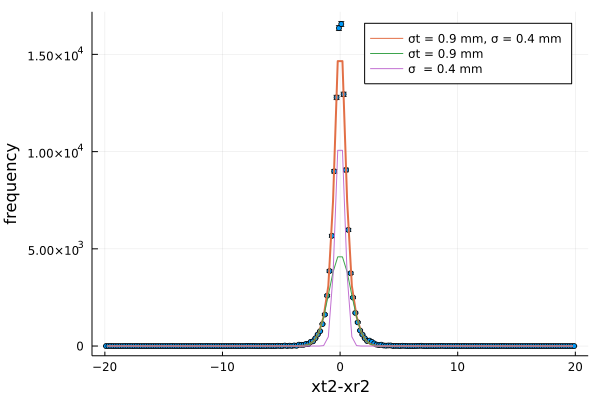

In [211]:
fg, p = JPetalo.fitg2(ndfp.xt2 - xp2, "xt2-xr2", 200, -20.0, 20.0, 
                      xg1min=-20.0, xg1max=-3.0, 
                      xg2min=-3.0,  xg2max =3.0, 
                      xgmin =-20.0, xgmax  =20.0)
@printf "sigma1 = %7.3f sigma2 = %7.3f" fg.std[1] fg.std[2]
plot(p)

 σ =     0.5 mm

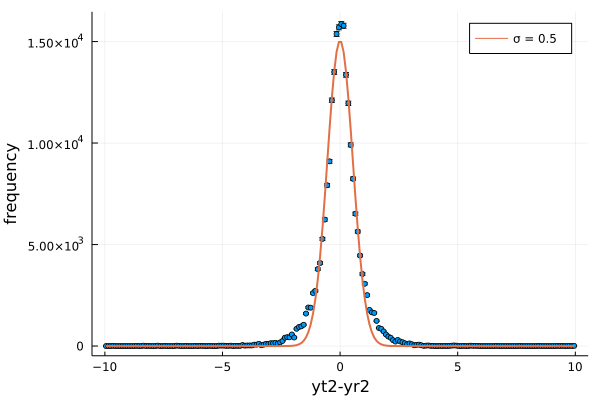

In [212]:
fg,pg = JPetalo.fitg1(ndfp.yt2 - yp2, "yt2-yr2", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

sigma1 =   0.943 sigma2 =   0.392

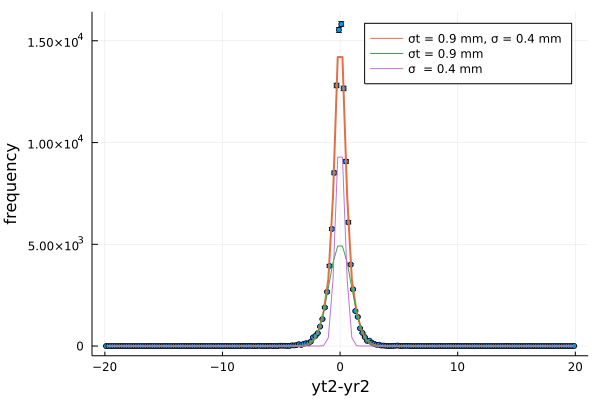

In [213]:
fg, p = JPetalo.fitg2(ndfp.yt2 - yp2, "yt2-yr2",  200, -20.0, 20.0, 
                      xg1min=-20.0, xg1max=-3.0, 
                      xg2min=-3.0,  xg2max =3.0, 
                      xgmin =-20.0, xgmax  =20.0)
@printf "sigma1 = %7.3f sigma2 = %7.3f" fg.std[1] fg.std[2]
plot(p)

 σ =     0.4 mm

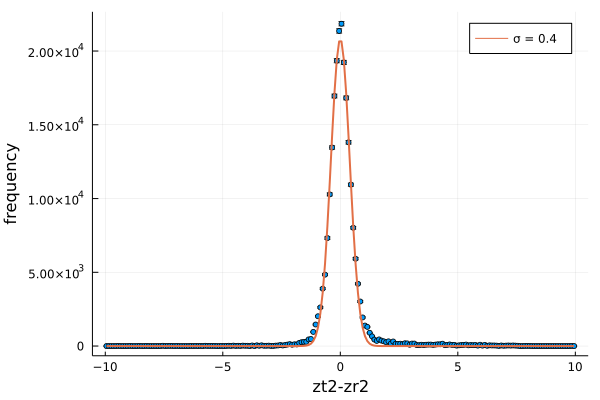

In [214]:
fg,pg = JPetalo.fitg1(ndfp.zt2 - zp2, "zt2-zr2", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

sigma1 =   0.781 sigma2 =   0.373

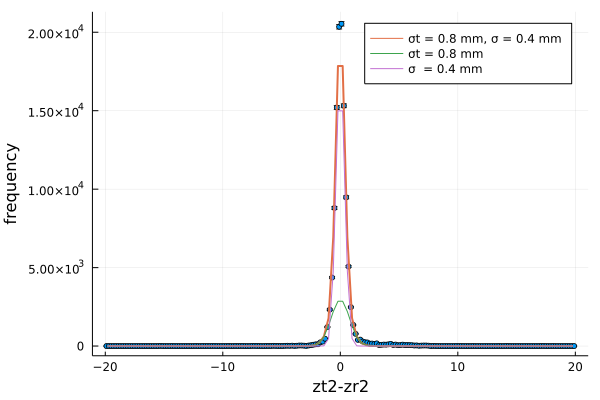

In [215]:
fg, p = JPetalo.fitg2(ndfp.zt2 - zp2, "zt2-zr2",  200, -20.0, 20.0, 
                      xg1min=-20.0, xg1max=-3.0, 
                      xg2min=-3.0,  xg2max =3.0, 
                      xgmin =-20.0, xgmax  =20.0)
@printf "sigma1 = %7.3f sigma2 = %7.3f" fg.std[1] fg.std[2]
plot(p)

## Summary: resolution in (X,Y,Z):
- Resolution in Z is very good, not affected by radial corrections.
- Resolution in (X,Y) depends on r estimator resolution, and is much worse for all events.

## TOF

In [217]:
dfu = JPetalo.setunits(ndfq, "v2");

In [218]:
dt12 = JPetalo.deltatime(dfu, JPetalo.dtfirst);

In [219]:
t12 = dt12./ps;

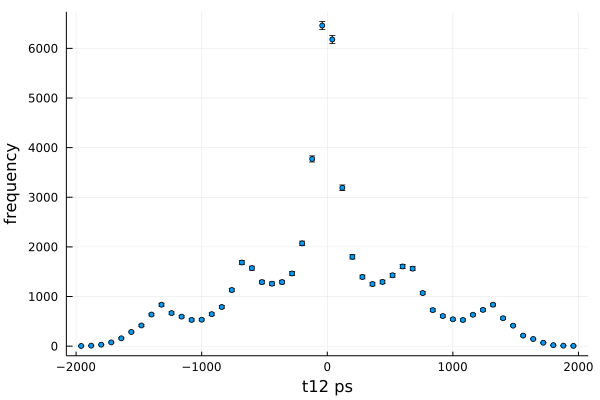

In [220]:
h,p       = JPetalo.hist1d(t12, "t12 ps", 50,  -2000., 2000.)
plot(p)

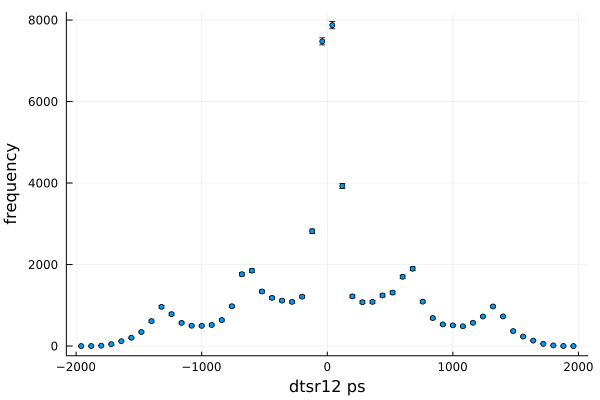

In [221]:
dtsr12 = JPetalo.ctsr(dfu, JPetalo.postrue)
tsr12 = dtsr12./ps
h,p       = JPetalo.hist1d(tsr12, "dtsr12 ps", 50,  -2000., 2000.)
plot(p)

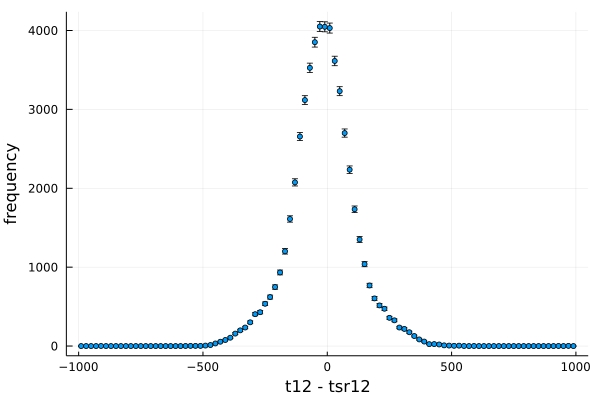

In [222]:
h,p       = JPetalo.hist1d(t12-tsr12, "t12 - tsr12", 100,  -1000., 1000.)
plot(p)

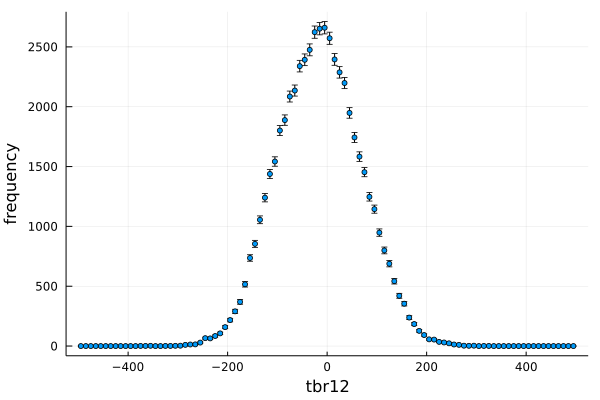

In [223]:
dtrb12 = JPetalo.cdoi(dfu, r1q, r2q,JPetalo.postrue);
trb12 = dtrb12 ./ps
h,p       = JPetalo.hist1d(trb12, "tbr12", 100,  -500., 500.)
plot(p)

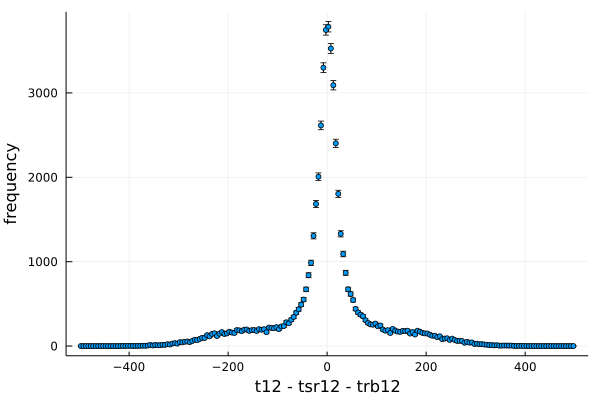

In [224]:
h,p       = JPetalo.hist1d(t12 - tsr12 - trb12  , "t12 - tsr12 - trb12", 200,  -500., 500.)
plot(p)

In [225]:
dt = t12 - tsr12 - trb12;

sigma1 = 131.940 sigma2 =  17.744

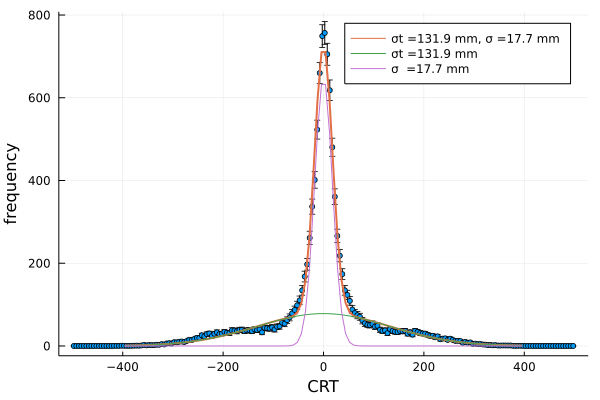

In [226]:
fg, p = JPetalo.fitg2(dt, "CRT", 200, -500.0, 500.0, 
                      xg1min=-400.0, xg1max=-50.0, 
                      xg2min=-50.0,  xg2max =50.0, 
                      xgmin =-400.0, xgmax  =400.0)
@printf "sigma1 = %7.3f sigma2 = %7.3f" fg.std[1] fg.std[2]
plot(p)

In [227]:
JPetalo.saveplot(p, "tof-resolution-intrinsic-$sipm-$proc")

First photon, position true: FWHM1 = 303.462 FWHM2 =  40.810

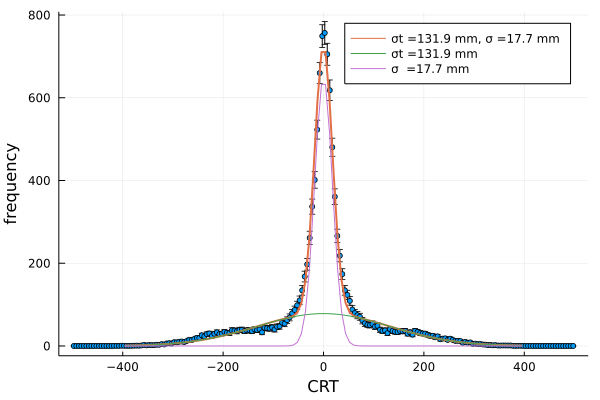

In [228]:
dt = JPetalo.crt(dfu, rx1p, rx2p, JPetalo.dtfirst,JPetalo.postrue)
fg, p = JPetalo.fitg2(dt, "CRT", 200, -500.0, 500.0, 
                      xg1min=-400.0, xg1max=-50.0, 
                      xg2min=-50.0,  xg2max =50.0, 
                      xgmin =-400.0, xgmax  =400.0)
@printf "First photon, position true: FWHM1 = %7.3f FWHM2 = %7.3f" 2.3*fg.std[1] 2.3*fg.std[2]
plot(p)

fastest photoelectron, position reco: FWHM = 191.285

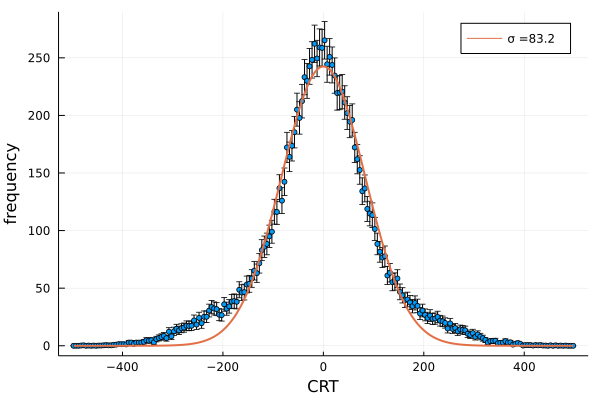

In [229]:
dt = JPetalo.crt(dfu, rx1p, rx2p, JPetalo.dtminimum, JPetalo.postrue)
fg,p = JPetalo.fitg1(dt, "CRT", 200, -500.0, 500.0,  
                     xgmin=-400.0, xgmax=400.0)
@printf "fastest photoelectron, position reco: FWHM = %7.3f" 2.3*fg.std[1] 
plot(p)

First photon, position true: FWHM1 = 350.396 FWHM2 = 139.776

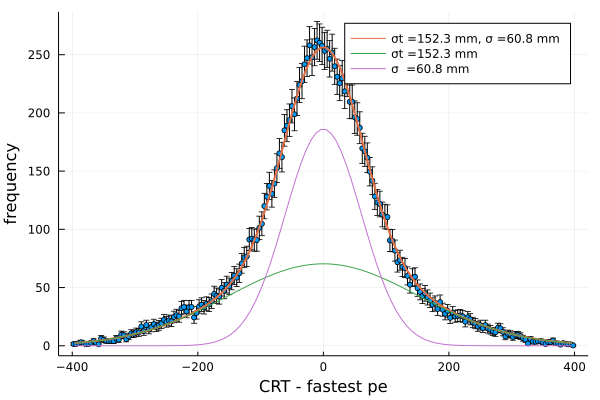

In [230]:
dt = JPetalo.crt(dfu, rx1p, rx2p, JPetalo.dtminimum,JPetalo.posreco)
fg, p = JPetalo.fitg2(dt, "CRT - fastest pe", 200, -400.0, 400.0, 
                      xg1min=-400.0, xg1max=-100.0, 
                      xg2min=-100.0,  xg2max =100.0, 
                      xgmin =-400.0, xgmax  =400.0)
@printf "First photon, position true: FWHM1 = %7.3f FWHM2 = %7.3f" 2.3*fg.std[1] 2.3*fg.std[2]
plot(p)

In [231]:
JPetalo.saveplot(p, "tof-resolution-firstpe-$sipm-$proc")

fastest photoelectron, position reco: FWHM = 191.179

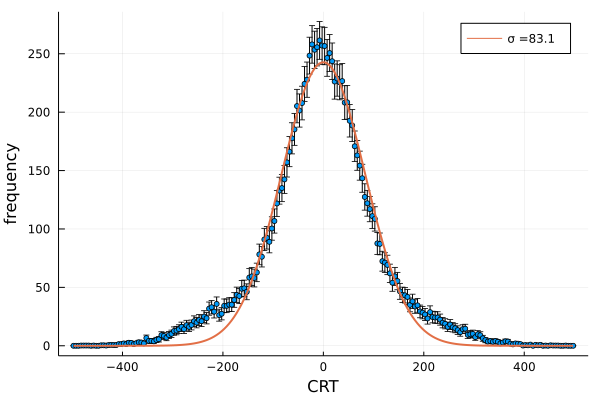

In [232]:
dt = JPetalo.crt(dfu, rx1p, rx2p, JPetalo.dtminimum,JPetalo.posreco)
fg,p = JPetalo.fitg1(dt, "CRT", 200, -500.0, 500.0,  
                     xgmin=-400.0, xgmax=400.0)
@printf "fastest photoelectron, position reco: FWHM = %7.3f" 2.3*fg.std[1] 
plot(p)

average photoelectron, position reco: FWHM = 259.563

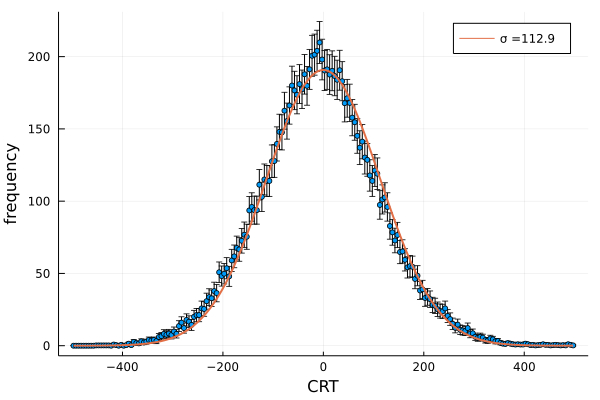

In [233]:
dt = JPetalo.crt(dfu, rx1p, rx2p, JPetalo.dtaverage,JPetalo.posreco)
fg,p = JPetalo.fitg1(dt, "CRT", 200, -500.0, 500.0,  
                     xgmin=-400.0, xgmax=400.0)
@printf "average photoelectron, position reco: FWHM = %7.3f" 2.3*fg.std[1] 
plot(p)

average photoelectron, position reco: FWHM = 262.639

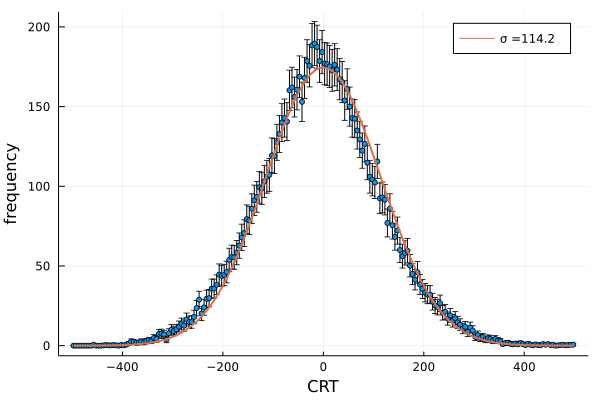

In [234]:
dt = JPetalo.crt(dfu, rx1p, rx2p, JPetalo.dtaverage,JPetalo.posrecall)
fg,p = JPetalo.fitg1(dt, "CRT", 200, -500.0, 500.0,  
                     xgmin=-400.0, xgmax=400.0)
@printf "average photoelectron, position reco: FWHM = %7.3f" 2.3*fg.std[1] 
plot(p)

## Add rx1p and rx2p

In [82]:
ndfp[!,"r1p"] = r1p;
ndfp[!,"r2p"] = r2p;

In [79]:
nrow(ndfz)

47322

In [86]:
nrow(ndfp)

22537

In [83]:
ndfz[!,"r1z"] = r1z;
ndfz[!,"r2z"] = r2z;

In [84]:
println(names(ndfp))

["nsipm1", "nsipm2", "phistd1", "phistd2", "q1", "q2", "r1", "r2", "t1", "t2", "ta1", "ta2", "tr1", "tr2", "ux", "uy", "uz", "x1", "x2", "xb1", "xb2", "xr1", "xr2", "xs", "xt1", "xt2", "y1", "y2", "yb1", "yb2", "yr1", "yr2", "ys", "yt1", "yt2", "z1", "z2", "zb1", "zb2", "zr1", "zr2", "zs", "zstd1", "zstd2", "zt1", "zt2", "r1p", "r2p"]


In [85]:
println(names(ndfz))

["nsipm1", "nsipm2", "phistd1", "phistd2", "q1", "q2", "r1", "r2", "t1", "t2", "ta1", "ta2", "tr1", "tr2", "ux", "uy", "uz", "x1", "x2", "xb1", "xb2", "xr1", "xr2", "xs", "xt1", "xt2", "y1", "y2", "yb1", "yb2", "yr1", "yr2", "ys", "yt1", "yt2", "z1", "z2", "zb1", "zb2", "zr1", "zr2", "zs", "zstd1", "zstd2", "zt1", "zt2", "r1z", "r2z"]


## Save

In [87]:
JPetalo.writemdf(datadir("n3mdf-50ps"),"mdf-phistd-$sipm-$proc.csv", ndfp)

"/Users/jj/JuliaProjects/JPetalo/data/n3mdf-50ps/mdf-phistd-naked-phot.csv"

In [89]:
JPetalo.writemdf(datadir("n3mdf-50ps"),"mdf-zstd-$sipm-$proc.csv", ndfz)

"/Users/jj/JuliaProjects/JPetalo/data/n3mdf-50ps/mdf-zstd-naked-phot.csv"